# APS 3 - Aula 20
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from funcoesTermosol import *
import math
from app_utils import *

# Treliça 1

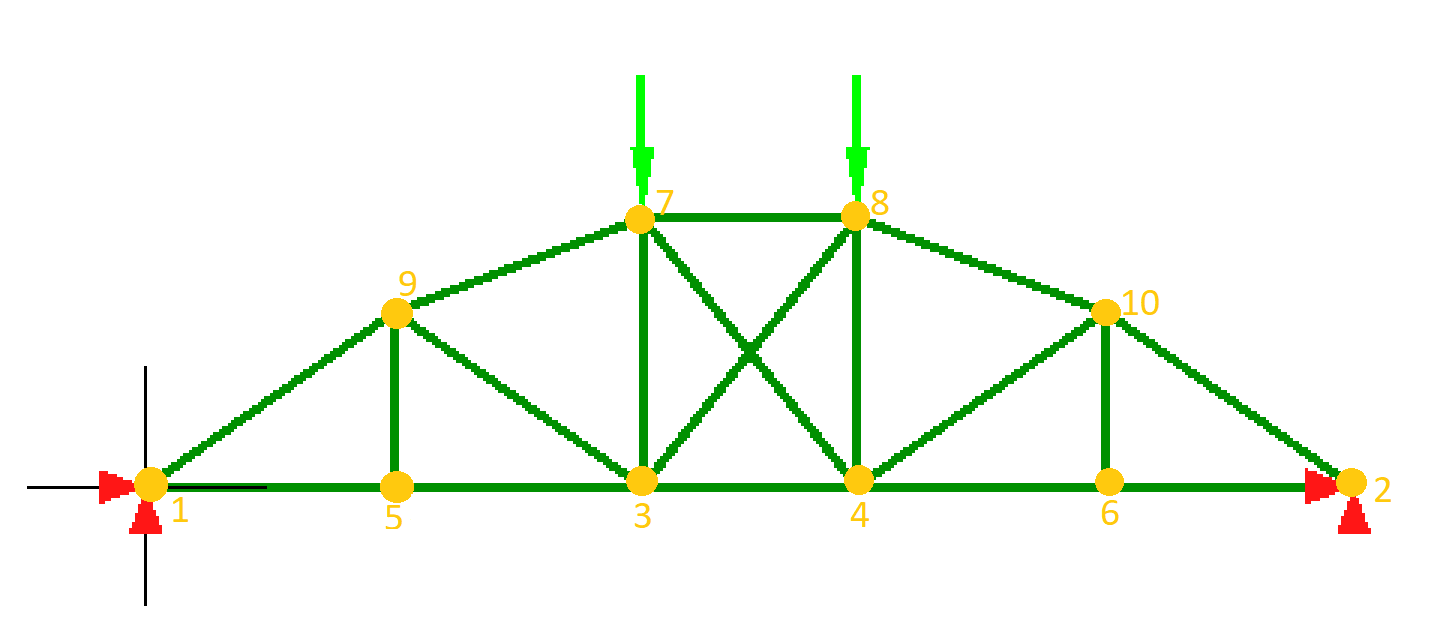

In [2]:
num_nos, matriz_nos, num_membros, matriz_incidencia, num_cargas, v_carregamento, num_rest, v_rest = importa("entrada.xlsx")

In [3]:
#calcula matriz de conectividade global
conectividade_global = conec_global_T(matriz_incidencia, num_membros, num_nos)
conectividade_global;

In [4]:
#calcula matriz dos membros
matriz_dos_membros = np.dot(matriz_nos, conectividade_global) 
matriz_dos_membros;

In [5]:
calculate_Se(1, matriz_incidencia, matriz_nos, matriz_dos_membros);

In [6]:
calculate_K(1, matriz_incidencia, matriz_nos, matriz_dos_membros, num_nos);

In [7]:
#caclula matriz de rigidez global
KG = matriz_global(num_nos, num_membros, matriz_incidencia, matriz_nos, matriz_dos_membros) 

In [8]:
KG;

In [9]:
#condição de contorno
Pg = vetor_global_de_forcas(num_rest, v_rest, v_carregamento)
Pg;

In [10]:
#exclui linhas e colunas
KG_solucao = MR_para_solucao(KG, v_rest)

In [11]:
#calcula os deslocamentos usando a solução de gauss
u = solucao_gauss(KG_solucao, Pg, 100000, 1e-4)

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

Convergiu na 148º iteracao


In [12]:
#adiciona 0 nos deslocamentos nulos
u_completo = completa_u(u, v_rest)

In [13]:
u_completo;

In [14]:
#calcula todas as forças de apoio
forcas = calculate_force_complete(KG, u_completo, v_rest)

In [15]:
title_to_print = ["R1x", "R1y", "R2x", "R2y"]
for i in range(len(title_to_print)):
    print("{0}: {1}".format(title_to_print[i], forcas[i]))

R1x: [115.70585935]
R1y: [74.84466697]
R2x: [-115.70672774]
R2y: [74.84866878]


In [16]:
#área fornecida pela estrutura
area = 0.00003

In [17]:
forca_membros=[]
tensao_membros=[]
deform_membros=[]
for i in range(num_membros):
    tensao, deformacao, forca = tensao_e_deformacao(i+1, num_membros, u_completo, matriz_incidencia, matriz_nos, area)
    forca_membros.append(forca)
    tensao_membros.append(tensao)
    deform_membros.append(deformacao)
    print("Membro {0}: tensao: {1} | deformacao: {2} | força: {3}".format(i+1, round(tensao,2), deformacao, round(forca,2)))

Membro 1: tensao: -210583.33 | deformacao: -5.2645832727096705e-05 | força: -6.32
Membro 2: tensao: -210502.0 | deformacao: -5.262550067487654e-05 | força: -6.32
Membro 3: tensao: 1195377.07 | deformacao: 0.0002988442685098146 | força: 35.86
Membro 4: tensao: -306377.15 | deformacao: -7.659428724920349e-05 | força: -9.19
Membro 5: tensao: -306377.15 | deformacao: -7.659428724920349e-05 | força: -9.19
Membro 6: tensao: -4418086.23 | deformacao: -0.0011045215577541363 | força: -132.54
Membro 7: tensao: -4953796.22 | deformacao: -0.0012384490551692856 | força: -148.61
Membro 8: tensao: -4182635.49 | deformacao: -0.0010456588735103388 | força: -125.48
Membro 9: tensao: -4936643.9 | deformacao: -0.0012341609749659266 | força: -148.1
Membro 10: tensao: -4339464.44 | deformacao: -0.0010848661106018108 | força: -130.18
Membro 11: tensao: -1923.54 | deformacao: -4.808851539111901e-07 | força: -0.06
Membro 12: tensao: -209524.13 | deformacao: -5.2381031577056507e-05 | força: -6.29
Membro 13: ten

In [18]:
#Algum membro ultrapassou a tensão de ruptura em tração ou compressão;
for e in tensao_membros:
    if abs(e) > 18e6:
        print("Colapso")

In [19]:
#Algum membro teve deformação maior do que 5%.
for i in deform_membros:
    if i > 0.05:
        print("Colapso")

In [20]:
#Algum nó se deslocou mais do que 20mm em X ou em Y.
for us in u_completo:
    if us > 0.02:
         print("Colapso")

In [21]:
peso, compr = valida_peso_comprimento(matriz_nos, matriz_incidencia, 848, 0.00003,num_membros)
print("Soma peso: {0} kg\nMax comprimento: {1}".format(sum(peso), max(compr)))

0
6
10
15
16
17
Soma peso: 0.04487296250839704 kg
Max comprimento: 0.128062484748657


In [22]:
#As entradas devem ser vetores coluna
geraSaida('APS3_saida', np.array((forcas)),u,np.array([deform_membros]).T,np.array([forca_membros]).T,np.array([tensao_membros]).T)

In [23]:
x = list(matriz_nos[0, :])
y = list(matriz_nos[1, :])

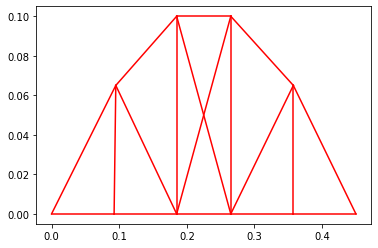

In [24]:
# Plotando a treliça sem os deslocamentos
for i in range(num_membros):
    no_1 = int(matriz_incidencia[i-1, 0])
    no_2 = int(matriz_incidencia[i-1, 1])
    
    x_nos = []
    y_nos = []
    
    x_nos.append(matriz_nos[0, no_1-1])
    x_nos.append(matriz_nos[0, no_2-1])
    
    y_nos.append(matriz_nos[1, no_1-1])
    y_nos.append(matriz_nos[1, no_2-1])
    
    plt.plot(x_nos, y_nos, color="red")

# Treliça 2

In [25]:
num_nos, matriz_nos, num_membros, matriz_incidencia, num_cargas, v_carregamento, num_rest, v_rest = importa("entrada2.xlsx")

In [26]:
#calcula matriz de conectividade global
conectividade_global = conec_global_T(matriz_incidencia, num_membros, num_nos)
conectividade_global;

In [27]:
#calcula matriz dos membros
matriz_dos_membros = np.dot(matriz_nos, conectividade_global) 
matriz_dos_membros;

In [28]:
calculate_Se(1, matriz_incidencia, matriz_nos, matriz_dos_membros);

In [29]:
calculate_K(1, matriz_incidencia, matriz_nos, matriz_dos_membros, num_nos);

In [30]:
#caclula matriz de rigidez global
KG = matriz_global(num_nos, num_membros, matriz_incidencia, matriz_nos, matriz_dos_membros) 

In [31]:
KG;

In [32]:
#condição de contorno
Pg = vetor_global_de_forcas(num_rest, v_rest, v_carregamento)
Pg;

In [33]:
#exclui linhas e colunas
KG_solucao = MR_para_solucao(KG, v_rest)

In [34]:
#calcula os deslocamentos usando a solução de gauss
u = solucao_gauss(KG_solucao, Pg, 100000, 1e-4)

  0%|▏                                                                          | 228/100000 [00:00<00:44, 2263.43it/s]

Convergiu na 239º iteracao


In [35]:
#adiciona 0 nos deslocamentos nulos
u_completo = completa_u(u, v_rest)

In [36]:
u_completo;

In [37]:
#calcula todas as forças de apoio
forcas = calculate_force_complete(KG, u_completo, v_rest)

In [38]:
title_to_print = ["R1x", "R1y", "R2x", "R2y"]
for i in range(len(title_to_print)):
    print("{0}: {1}".format(title_to_print[i], forcas[i]))

R1x: [156.93881791]
R1y: [74.69299907]
R2x: [-156.93496011]
R2y: [74.69859148]


In [39]:
#área fornecida pela estrutura
area = 0.00003

In [40]:
forca_membros=[]
tensao_membros=[]
deform_membros=[]
for i in range(num_membros):
    tensao, deformacao, forca = tensao_e_deformacao(i+1, num_membros, u_completo, matriz_incidencia, matriz_nos, area)
    forca_membros.append(forca)
    tensao_membros.append(tensao)
    deform_membros.append(deformacao)
    print("Membro {0}: tensao: {1} | deformacao: {2} | força: {3}".format(i+1, round(tensao,2), deformacao, round(forca,2)))

Membro 1: tensao: -313875.42 | deformacao: -7.846885481034522e-05 | força: -9.42
Membro 2: tensao: -313639.05 | deformacao: -7.840976236132456e-05 | força: -9.41
Membro 3: tensao: 1749524.93 | deformacao: 0.00043738123325413116 | força: 52.49
Membro 4: tensao: -442794.09 | deformacao: -0.00011069852201054619 | força: -13.28
Membro 5: tensao: -442794.09 | deformacao: -0.00011069852201054619 | força: -13.28
Membro 6: tensao: -5511800.32 | deformacao: -0.0013779500788037885 | força: -165.35
Membro 7: tensao: -6482277.06 | deformacao: -0.0016205692661272087 | força: -194.47
Membro 8: tensao: -5479902.84 | deformacao: -0.0013699757088317548 | força: -164.4
Membro 9: tensao: -6469387.66 | deformacao: -0.001617346914977813 | força: -194.08
Membro 10: tensao: -5397070.08 | deformacao: -0.001349267519037054 | força: -161.91
Membro 11: tensao: -4208.46 | deformacao: -1.0521153693055926e-06 | força: -0.13
Membro 12: tensao: -61384.71 | deformacao: -1.5346177650037267e-05 | força: -1.84
Membro 13:

In [41]:
#Algum membro ultrapassou a tensão de ruptura em tração ou compressão;
for e in tensao_membros:
    if abs(e) > 18e6:
        print("Colapso")

In [42]:
#Algum membro teve deformação maior do que 5%.
for i in deform_membros:
    if i > 0.05:
        print("Colapso")

In [43]:
#Algum nó se deslocou mais do que 20mm em X ou em Y.
for us in u_completo:
    if us > 0.02:
         print("Colapso")

In [44]:
peso, compr = valida_peso_comprimento(matriz_nos, matriz_incidencia, 848, 0.00003,num_membros)
print("Soma peso: {0} kg\nMax comprimento: {1}".format(sum(peso), max(compr)))

Soma peso: 0.040677961807283614 kg
Max comprimento: 0.10897706180660223


In [45]:
x = list(matriz_nos[0, :])
y = list(matriz_nos[1, :])

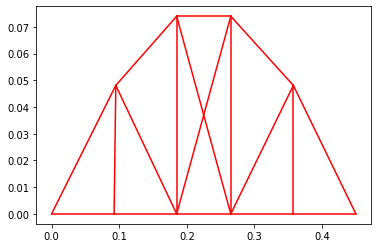

In [46]:
# Plotando a treliça sem os deslocamentos
for i in range(num_membros):
    no_1 = int(matriz_incidencia[i-1, 0])
    no_2 = int(matriz_incidencia[i-1, 1])
    
    x_nos = []
    y_nos = []
    
    x_nos.append(matriz_nos[0, no_1-1])
    x_nos.append(matriz_nos[0, no_2-1])
    
    y_nos.append(matriz_nos[1, no_1-1])
    y_nos.append(matriz_nos[1, no_2-1])
    
    plt.plot(x_nos, y_nos, color="red")

# Treliça 3 - max: 620

In [47]:
num_nos, matriz_nos, num_membros, matriz_incidencia, num_cargas, v_carregamento, num_rest, v_rest = importa("entrada3.xlsx")

In [203]:
v_carregamento[13] = -620
v_carregamento[15] = -620

In [204]:
#calcula matriz de conectividade global
conectividade_global = conec_global_T(matriz_incidencia, num_membros, num_nos)
conectividade_global;

In [205]:
#calcula matriz dos membros
matriz_dos_membros = np.dot(matriz_nos, conectividade_global) 
matriz_dos_membros;

In [206]:
calculate_Se(1, matriz_incidencia, matriz_nos, matriz_dos_membros);

In [207]:
calculate_K(1, matriz_incidencia, matriz_nos, matriz_dos_membros, num_nos);

In [208]:
#caclula matriz de rigidez global
KG = matriz_global(num_nos, num_membros, matriz_incidencia, matriz_nos, matriz_dos_membros) 

In [209]:
KG;

In [210]:
#condição de contorno
Pg = vetor_global_de_forcas(num_rest, v_rest, v_carregamento)
Pg;

In [211]:
#exclui linhas e colunas
KG_solucao = MR_para_solucao(KG, v_rest)

In [212]:
#calcula os deslocamentos usando a solução de gauss
u = solucao_gauss(KG_solucao, Pg, 100000, 1e-4)

 10%|███████▎                                                                  | 9839/100000 [00:03<00:31, 2842.09it/s]

Convergiu na 10024º iteracao


In [213]:
#adiciona 0 nos deslocamentos nulos
u_completo = completa_u(u, v_rest)

In [214]:
u_completo;

In [215]:
#calcula todas as forças de apoio
forcas = calculate_force_complete(KG, u_completo, v_rest)

In [216]:
title_to_print = ["R1x", "R1y", "R2x", "R2y"]
for i in range(len(title_to_print)):
    print("{0}: {1}".format(title_to_print[i], forcas[i]))

R1x: [1459.30077408]
R1y: [619.92882599]
R2x: [-1460.37442223]
R2y: [620.06975842]


In [217]:
#área fornecida pela estrutura
area = 0.00009

In [218]:
forca_membros=[]
tensao_membros=[]
deform_membros=[]
for i in range(num_membros):
    tensao, deformacao, forca = tensao_e_deformacao(i+1, num_membros, u_completo, matriz_incidencia, matriz_nos, area)
    forca_membros.append(forca)
    tensao_membros.append(tensao)
    deform_membros.append(deformacao)
    print("Membro {0}: tensao: {1} | deformacao: {2} | força: {3}".format(i+1, round(tensao,2), deformacao, round(forca,2)))

Membro 1: tensao: -2610101.35 | deformacao: -0.0006525253386826256 | força: -234.91
Membro 2: tensao: 1588558.51 | deformacao: 0.00039713962763769157 | força: 142.97
Membro 3: tensao: 2817444.06 | deformacao: 0.000704361016100635 | força: 253.57
Membro 4: tensao: 1561863.12 | deformacao: 0.00039046578024091 | força: 140.57
Membro 5: tensao: -2977028.66 | deformacao: -0.0007442571642019302 | força: -267.93
Membro 6: tensao: -15248746.83 | deformacao: -0.0038121867075794733 | força: -1372.39
Membro 7: tensao: -13354077.61 | deformacao: -0.003338519401724613 | força: -1201.87
Membro 8: tensao: -15405764.11 | deformacao: -0.003851441028070817 | força: -1386.52
Membro 9: tensao: -13174427.4 | deformacao: -0.003293606849801437 | força: -1185.7
Membro 10: tensao: -14933614.64 | deformacao: -0.0037334036601846814 | força: -1344.03
Membro 11: tensao: 3630128.04 | deformacao: 0.0009075320098204064 | força: 326.71
Membro 12: tensao: 1974729.07 | deformacao: 0.000493682267223796 | força: 177.73
Me

In [219]:
min(tensao_membros)

-15405764.112283267

In [220]:
max(tensao_membros)

3630128.0392816253

In [221]:
#Algum membro ultrapassou a tensão de ruptura em tração ou compressão;
min(tensao_membros)
for e in tensao_membros:
    if abs(e) > 18*(10**6):
        print("Colapso")

In [222]:
#Algum membro teve deformação maior do que 5%.
for i in deform_membros:
    if i > 0.05:
        print("Colapso")

In [351]:
#Algum nó se deslocou mais do que 20mm em X ou em Y.
for us in u_completo:
    if abs(us) > 0.02:
         print("Colapso")

In [224]:
peso, compr = valida_peso_comprimento(matriz_nos, matriz_incidencia, 848, area,num_membros)
print("Soma peso: {0} kg\nMax comprimento: {1}".format(sum(peso), max(compr)))

Soma peso: 0.14011528513011967 kg
Max comprimento: 0.10897706180660223


In [225]:
x = list(matriz_nos[0, :])
y = list(matriz_nos[1, :])

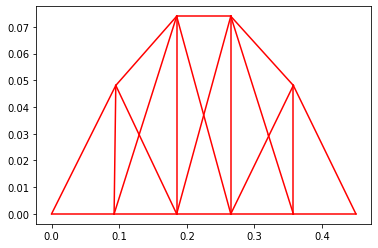

In [226]:
# Plotando a treliça sem os deslocamentos
for i in range(num_membros):
    no_1 = int(matriz_incidencia[i-1, 0])
    no_2 = int(matriz_incidencia[i-1, 1])
    
    x_nos = []
    y_nos = []
    
    x_nos.append(matriz_nos[0, no_1-1])
    x_nos.append(matriz_nos[0, no_2-1])
    
    y_nos.append(matriz_nos[1, no_1-1])
    y_nos.append(matriz_nos[1, no_2-1])
    
    plt.plot(x_nos, y_nos, color="red")

# Treliça 3_1 - MAX: 720

In [72]:
num_nos, matriz_nos, num_membros, matriz_incidencia, num_cargas, v_carregamento, num_rest, v_rest = importa("entrada3_1.xlsx")

In [179]:
v_carregamento[13] = -720
v_carregamento[15] = -720

In [180]:
#calcula matriz de conectividade global
conectividade_global = conec_global_T(matriz_incidencia, num_membros, num_nos)
conectividade_global;

In [181]:
#calcula matriz dos membros
matriz_dos_membros = np.dot(matriz_nos, conectividade_global) 
matriz_dos_membros;

In [182]:
calculate_Se(1, matriz_incidencia, matriz_nos, matriz_dos_membros);

In [183]:
calculate_K(1, matriz_incidencia, matriz_nos, matriz_dos_membros, num_nos);

In [184]:
#caclula matriz de rigidez global
KG = matriz_global(num_nos, num_membros, matriz_incidencia, matriz_nos, matriz_dos_membros) 

In [185]:
KG;

In [186]:
#condição de contorno
Pg = vetor_global_de_forcas(num_rest, v_rest, v_carregamento)
Pg;

In [187]:
#exclui linhas e colunas
KG_solucao = MR_para_solucao(KG, v_rest)

In [188]:
#calcula os deslocamentos usando a solução de gauss
u = solucao_gauss(KG_solucao, Pg, 100000, 1e-4)

 10%|███████▍                                                                  | 9986/100000 [00:03<00:33, 2707.80it/s]

Convergiu na 10024º iteracao


In [189]:
#adiciona 0 nos deslocamentos nulos
u_completo = completa_u(u, v_rest)

In [190]:
u_completo;

In [191]:
#calcula todas as forças de apoio
forcas = calculate_force_complete(KG, u_completo, v_rest)

In [192]:
title_to_print = ["R1x", "R1y", "R2x", "R2y"]
for i in range(len(title_to_print)):
    print("{0}: {1}".format(title_to_print[i], forcas[i]))

R1x: [1694.67186667]
R1y: [719.91734631]
R2x: [-1695.91868388]
R2y: [720.08100978]


In [193]:
#área fornecida pela estrutura
area = 0.00009

In [194]:
forca_membros=[]
tensao_membros=[]
deform_membros=[]
for i in range(num_membros):
    tensao, deformacao, forca = tensao_e_deformacao(i+1, num_membros, u_completo, matriz_incidencia, matriz_nos, area)
    forca_membros.append(forca)
    tensao_membros.append(tensao)
    deform_membros.append(deformacao)
    print("Membro {0}: tensao: {1} | deformacao: {2} | força: {3}".format(i+1, round(tensao,2), deformacao, round(forca,2)))

Membro 1: tensao: -3031085.44 | deformacao: -0.0007577713610507922 | força: -272.8
Membro 2: tensao: 1844777.63 | deformacao: 0.00046119440628893235 | força: 166.03
Membro 3: tensao: 3271870.53 | deformacao: 0.0008179676316007368 | força: 294.47
Membro 4: tensao: 1813776.53 | deformacao: 0.00045344413189266894 | força: 163.24
Membro 5: tensao: -3457194.57 | deformacao: -0.0008642986422990136 | força: -311.15
Membro 6: tensao: -17708222.13 | deformacao: -0.004427055531382609 | força: -1593.74
Membro 7: tensao: -15507961.09 | deformacao: -0.003876990272970515 | força: -1395.72
Membro 8: tensao: -17890564.78 | deformacao: -0.00447264119388869 | força: -1610.15
Membro 9: tensao: -15299335.04 | deformacao: -0.0038248337610597314 | força: -1376.94
Membro 10: tensao: -17342262.16 | deformacao: -0.004335565540859632 | força: -1560.8
Membro 11: tensao: 4215632.56 | deformacao: 0.0010539081404365995 | força: 379.41
Membro 12: tensao: 2293233.76 | deformacao: 0.0005733084393566612 | força: 206.39

In [195]:
min(tensao_membros)

-17890564.77555476

In [196]:
max(tensao_membros)

4215632.561746399

In [197]:
#Algum membro ultrapassou a tensão de ruptura em tração ou compressão;
min(tensao_membros)
for e in tensao_membros:
    if abs(e) > 18*(10**6):
        print("Colapso")

In [198]:
#Algum membro teve deformação maior do que 5%.
for i in deform_membros:
    if i > 0.05:
        print("Colapso")

In [350]:
#Algum nó se deslocou mais do que 20mm em X ou em Y.
for us in u_completo:
    if abs(us) > 0.02:
         print("Colapso")

In [200]:
peso, compr = valida_peso_comprimento(matriz_nos, matriz_incidencia, 848, area,num_membros)
print("Soma peso: {0} kg\nMax comprimento: {1}".format(sum(peso), max(compr)))

Soma peso: 0.14011528513011967 kg
Max comprimento: 0.10897706180660223


In [201]:
x = list(matriz_nos[0, :])
y = list(matriz_nos[1, :])

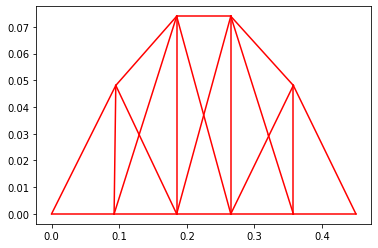

In [202]:
# Plotando a treliça sem os deslocamentos
for i in range(num_membros):
    no_1 = int(matriz_incidencia[i-1, 0])
    no_2 = int(matriz_incidencia[i-1, 1])
    
    x_nos = []
    y_nos = []
    
    x_nos.append(matriz_nos[0, no_1-1])
    x_nos.append(matriz_nos[0, no_2-1])
    
    y_nos.append(matriz_nos[1, no_1-1])
    y_nos.append(matriz_nos[1, no_2-1])
    
    plt.plot(x_nos, y_nos, color="red")

# Treliça 3_2 - MAX: 1000

In [252]:
num_nos, matriz_nos, num_membros, matriz_incidencia, num_cargas, v_carregamento, num_rest, v_rest = importa("entrada3_2.xlsx")

In [352]:
v_carregamento[13] = -1020
v_carregamento[15] = -1020

In [353]:
#calcula matriz de conectividade global
conectividade_global = conec_global_T(matriz_incidencia, num_membros, num_nos)
conectividade_global;

In [354]:
#calcula matriz dos membros
matriz_dos_membros = np.dot(matriz_nos, conectividade_global) 
matriz_dos_membros;

In [355]:
calculate_Se(1, matriz_incidencia, matriz_nos, matriz_dos_membros);

In [356]:
calculate_K(1, matriz_incidencia, matriz_nos, matriz_dos_membros, num_nos);

In [357]:
#caclula matriz de rigidez global
KG = matriz_global(num_nos, num_membros, matriz_incidencia, matriz_nos, matriz_dos_membros) 

In [358]:
KG;

In [359]:
#condição de contorno
Pg = vetor_global_de_forcas(num_rest, v_rest, v_carregamento)
Pg;

In [360]:
#exclui linhas e colunas
KG_solucao = MR_para_solucao(KG, v_rest)

In [361]:
#calcula os deslocamentos usando a solução de gauss
u = solucao_gauss(KG_solucao, Pg, 100000, 1e-4)

 10%|███████▎                                                                  | 9880/100000 [00:03<00:26, 3446.97it/s]

Convergiu na 10014º iteracao


In [362]:
#adiciona 0 nos deslocamentos nulos
u_completo = completa_u(u, v_rest)

In [363]:
u_completo;

In [364]:
#calcula todas as forças de apoio
forcas = calculate_force_complete(KG, u_completo, v_rest)

In [365]:
title_to_print = ["R1x", "R1y", "R2x", "R2y"]
for i in range(len(title_to_print)):
    print("{0}: {1}".format(title_to_print[i], forcas[i]))

R1x: [502.13582799]
R1y: [447.76604842]
R2x: [-518.00544736]
R2y: [451.04286007]


In [366]:
#área fornecida pela estrutura
area = 0.00009

In [367]:
forca_membros=[]
tensao_membros=[]
deform_membros=[]
for i in range(num_membros):
    tensao, deformacao, forca = tensao_e_deformacao(i+1, num_membros, u_completo, matriz_incidencia, matriz_nos, area)
    forca_membros.append(forca)
    tensao_membros.append(tensao)
    deform_membros.append(deformacao)
    print("Membro {0}: tensao: {1} | deformacao: {2} | força: {3}".format(i+1, round(tensao,2), deformacao, round(forca,2)))

Membro 1: tensao: 4246948.78 | deformacao: 0.001061737195299824 | força: 382.23
Membro 2: tensao: -4288681.31 | deformacao: -0.0010721703273968127 | força: -385.98
Membro 3: tensao: 453289.19 | deformacao: 0.00011332229663972213 | força: 40.8
Membro 4: tensao: -4232353.23 | deformacao: -0.0010580883077754178 | força: -380.91
Membro 5: tensao: 3882051.87 | deformacao: 0.0009705129671029164 | força: 349.38
Membro 6: tensao: -11013959.71 | deformacao: -0.002753489927149848 | força: -991.26
Membro 7: tensao: -12171847.5 | deformacao: -0.003042961874502011 | força: -1095.47
Membro 8: tensao: -17576648.08 | deformacao: -0.004394162020964458 | força: -1581.9
Membro 9: tensao: -11935964.97 | deformacao: -0.002983991242907804 | força: -1074.24
Membro 10: tensao: -10862810.46 | deformacao: -0.0027157026153959386 | força: -977.65
Membro 11: tensao: 828050.21 | deformacao: 0.00020701255216425495 | força: 74.52
Membro 12: tensao: 1651938.8 | deformacao: 0.00041298470087366545 | força: 148.67
Membro

In [368]:
min(tensao_membros)

-18335563.895779

In [369]:
max(tensao_membros)

4246948.781199296

In [370]:
#Algum membro ultrapassou a tensão de ruptura em tração ou compressão;
min(tensao_membros)
for e in tensao_membros:
    if abs(e) > 18*(10**6):
        print("Colapso")

Colapso
Colapso


In [371]:
#Algum membro teve deformação maior do que 5%.
for i in deform_membros:
    if i > 0.05:
        print("Colapso")

In [349]:
#Algum nó se deslocou mais do que 20mm em X ou em Y.
for us in u_completo:
    if abs(us) > 0.02:
         print("Colapso")

In [346]:
peso, compr = valida_peso_comprimento(matriz_nos, matriz_incidencia, 848, area,num_membros)
print("Soma peso: {0} kg\nMax comprimento: {1}".format(sum(peso), max(compr)))

Soma peso: 0.15110244974343096 kg
Max comprimento: 0.10897706180660223


In [347]:
x = list(matriz_nos[0, :])
y = list(matriz_nos[1, :])

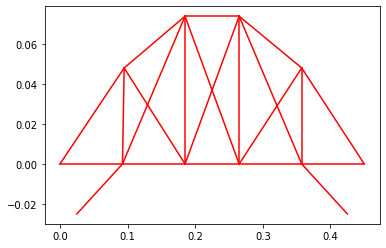

In [348]:
# Plotando a treliça sem os deslocamentos
for i in range(num_membros):
    no_1 = int(matriz_incidencia[i-1, 0])
    no_2 = int(matriz_incidencia[i-1, 1])
    
    x_nos = []
    y_nos = []
    
    x_nos.append(matriz_nos[0, no_1-1])
    x_nos.append(matriz_nos[0, no_2-1])
    
    y_nos.append(matriz_nos[1, no_1-1])
    y_nos.append(matriz_nos[1, no_2-1])
    
    plt.plot(x_nos, y_nos, color="red")